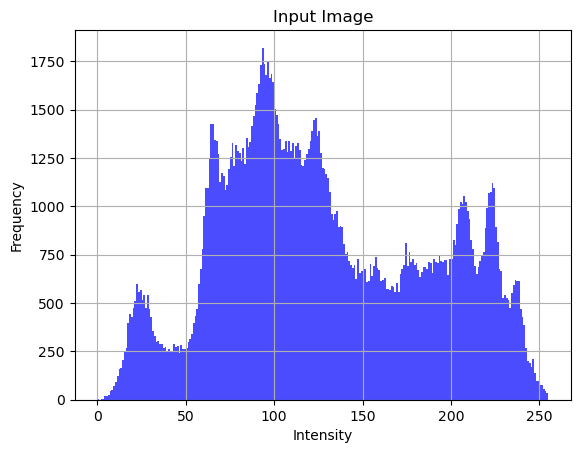

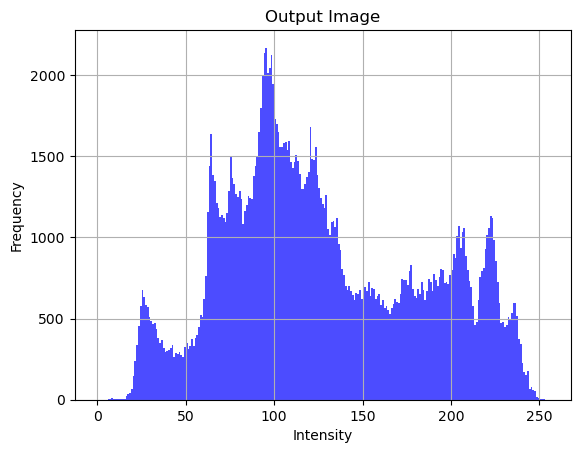

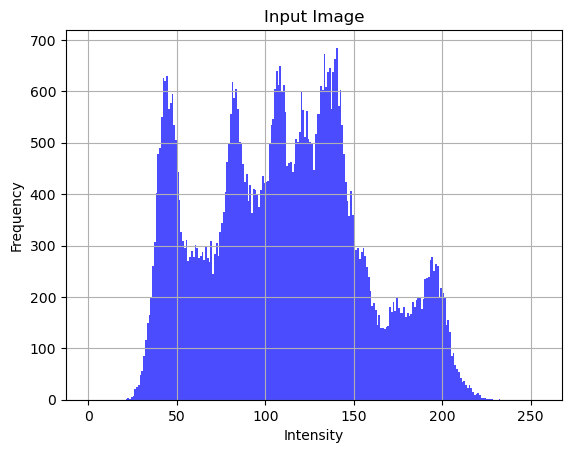

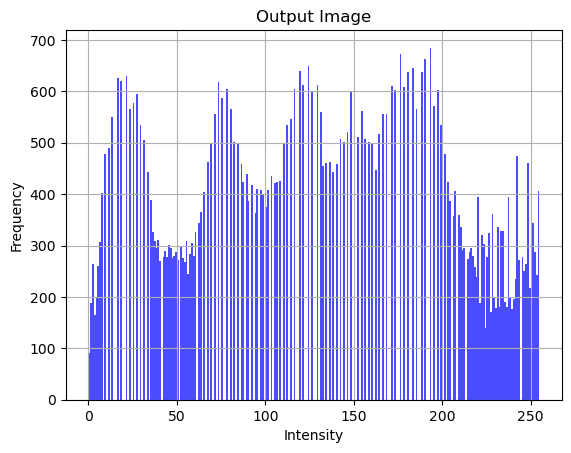

Exception in Tkinter callback
Exception ignored in: <function PhotoImage.__del__ at 0x000001BFA5B4A160>
Traceback (most recent call last):
  File "C:\Users\Ibrahim Yousaf\anaconda3\lib\site-packages\PIL\ImageTk.py", line 146, in __del__
    name = self.__photo.name
AttributeError: 'PhotoImage' object has no attribute '_PhotoImage__photo'
Traceback (most recent call last):
  File "C:\Users\Ibrahim Yousaf\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Ibrahim Yousaf\AppData\Local\Temp\ipykernel_7948\2510409101.py", line 230, in <lambda>
    HEButton = tk.Button(root, text="Histogram Equalization", bg="black", fg="white", font=("Arial", 15), command=lambda: HistogramEqualization(MyImage))
  File "C:\Users\Ibrahim Yousaf\AppData\Local\Temp\ipykernel_7948\2510409101.py", line 148, in HistogramEqualization
    EditedPhoto(filename)
  File "C:\Users\Ibrahim Yousaf\AppData\Local\Temp\ipykernel_7948\2510409101.py", line 31, in EditedPhoto

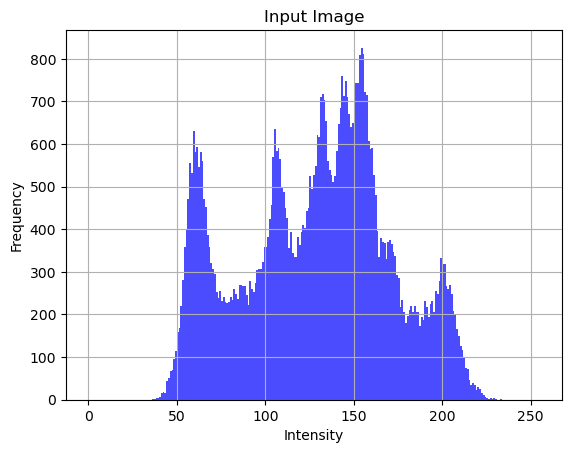

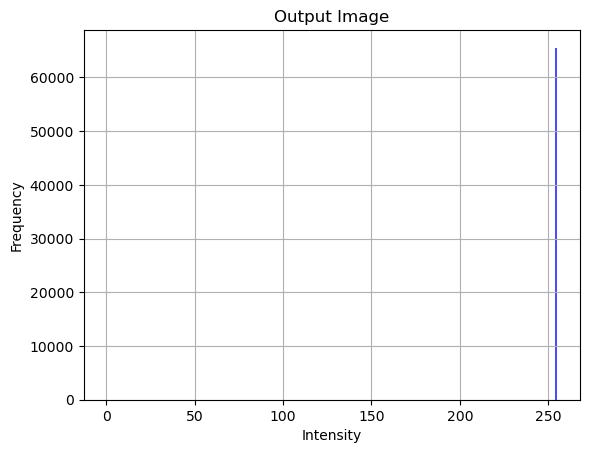

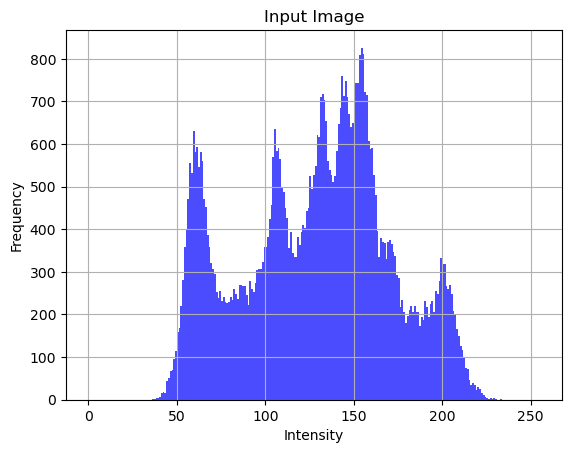

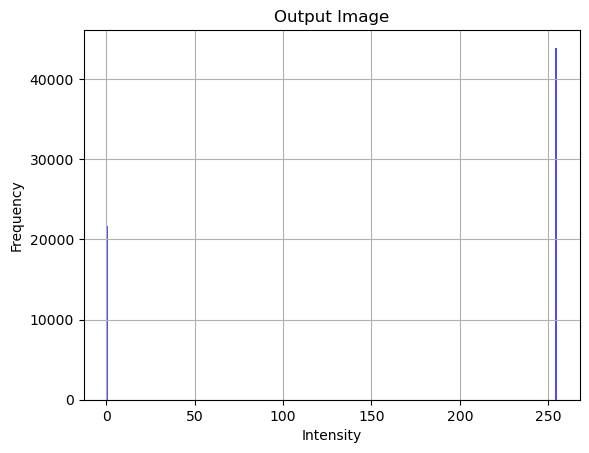

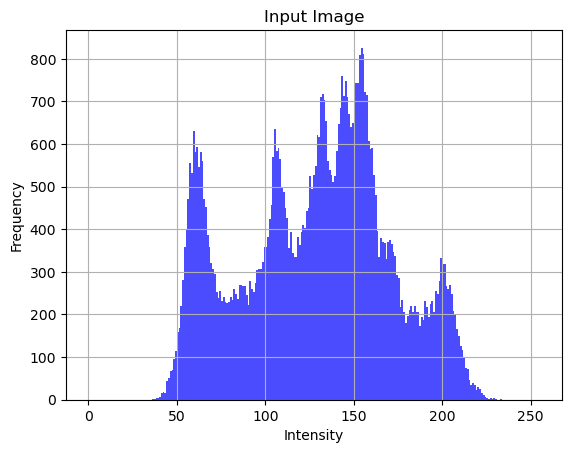

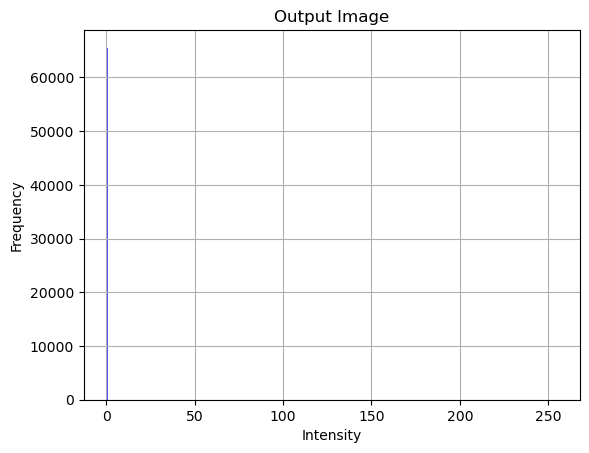

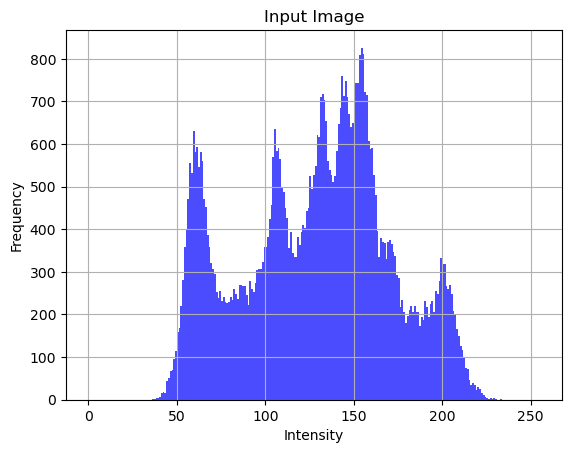

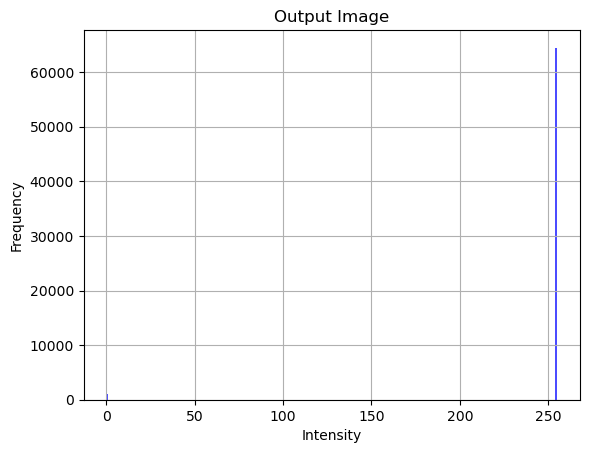

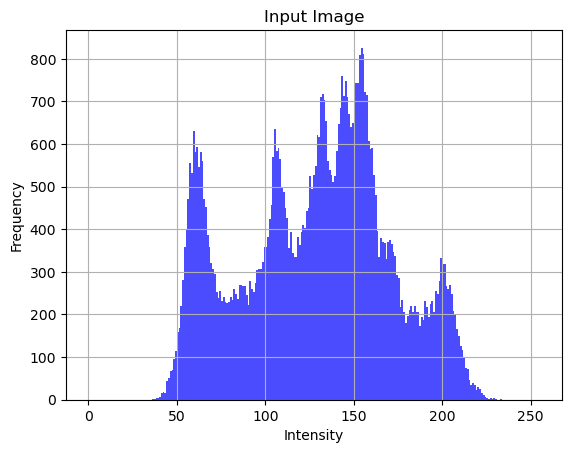

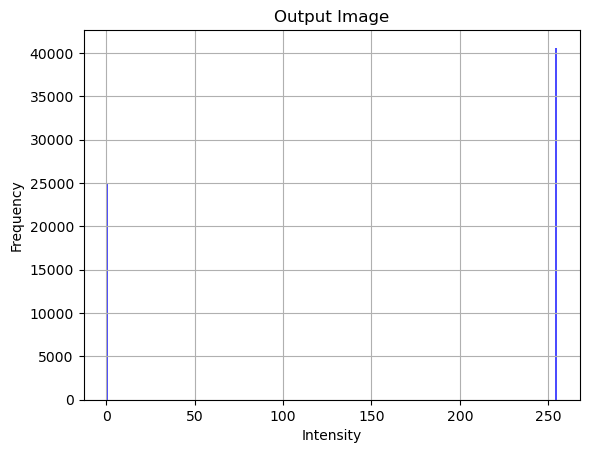

In [10]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import cv2 
from scipy import ndimage
from sklearn.cluster import KMeans

MyImage = ""
Threshold = 0

def BrowseDisplayImage():
    global MyImage
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg;*.gif")])
    MyImage = Image.open(file_path).resize((256, 256))
    photo = ImageTk.PhotoImage(MyImage)
    image_label.place(x=370, y=200)
    image_label.configure(image=photo)
    image_label.image = photo

def Slider(value):
    global Threshold
    Threshold = value
    label.config(text=f"Selected Threshold: {Threshold}")

def EditedPhoto(image):
    global edited_photo_label
    photo = ImageTk.PhotoImage(image)
    edited_photo_label.configure(image=photo)
    edited_photo_label.image = photo

def Thresholding(image):
    global Threshold
    if Threshold == 0:
        slider = tk.Scale(root, from_=0, to=256, orient=tk.HORIZONTAL, command=lambda value: Slider(value))
        slider.pack()
        slider.place(x=550, y=500)

    CopyImage = np.array(image).mean(axis=2, dtype=np.int32)
    fig1, ax1 = plt.subplots()
    plot(CopyImage.flatten(), "Input Image")
    canvas = FigureCanvasTkAgg(fig1, master=root)
    canvas.draw()
    canvas.get_tk_widget().place(x=2, y=200)
    canvas.get_tk_widget().config(width=355, height=255)

    CopyImage = np.where(CopyImage < int(Threshold), 0, 255)
    fig2, ax2 = plt.subplots()
    plot(CopyImage.flatten(), "Output Image")
    canvas = FigureCanvasTkAgg(fig2, master=root)
    canvas.draw()
    canvas.get_tk_widget().config(width=355, height=255)
    canvas.get_tk_widget().place(x=920, y=200)
    NEWIMAGE = Image.fromarray(CopyImage.astype('uint8')).convert('L')
    filename = 'NEWIMAGE.jpg'
    NEWIMAGE.save(filename)
    EditedPhoto(NEWIMAGE)

def LaplacianFilter(image):
    image_gray = image.convert('L')
    image_gray_array = np.array(image_gray)

    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

    filtered_image = cv2.filter2D(image_gray_array, -1, kernel)

    filtered_image = np.clip(filtered_image, 0, 255)
    filtered_image = Image.fromarray(filtered_image.astype('uint8')).convert('RGB')

    EditedPhoto(filtered_image)

def plot(x, title):
    plt.hist(x, bins=range(0, 256), color='blue', alpha=0.7)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.show()

def AverageFilter(image, kernel):
    image = np.array(image)
    fig1, ax1 = plt.subplots()
    plot(image.flatten(), "Input Image")
    canvas = FigureCanvasTkAgg(fig1, master=root)
    canvas.draw()
    canvas.get_tk_widget().place(x=2, y=200)
    canvas.get_tk_widget().config(width=355, height=255)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (j <= 253 and i <= 253):
                value = image[i:i + kernel, j:j + kernel, 0].flatten()[int(len(image[i:i + kernel, j:j + kernel, 0].flatten()) / 2)]
                Row, Column = np.where(image[i:i + kernel, j:j + kernel, 0] == value)[0][0], np.where(
                    image[i:i + kernel, j:j + kernel, 0] == value)[1][0]
                image[i:i + kernel, j:j + kernel, 0][Row][Column] = int(np.mean(image[i:i + kernel, j:j + kernel, 0]))

                value = image[i:i + kernel, j:j + kernel, 1].flatten()[int(len(image[i:i + kernel, j:j + kernel, 1].flatten()) / 2)]
                Row, Column = np.where(image[i:i + kernel, j:j + kernel, 1] == value)[0][0], np.where(
                    image[i:i + kernel, j:j + kernel, 1] == value)[1][0]
                image[i:i + kernel, j:j + kernel, 1][Row][Column] = int(np.mean(image[i:i + kernel, j:j + kernel, 1]))

                value = image[i:i + kernel, j:j + kernel, 2].flatten()[int(len(image[i:i + kernel, j:j + kernel, 2].flatten()) / 2)]
                Row, Column = np.where(image[i:i + kernel, j:j + kernel, 2] == value)[0][0], np.where(
                    image[i:i + kernel, j:j + kernel, 2] == value)[1][0]
                image[i:i + kernel, j:j + kernel, 2][Row][Column] = int(np.mean(image[i:i + kernel, j:j + kernel, 2]))
    fig2, ax2 = plt.subplots()
    plot(image.flatten(), "Output Image")
    canvas = FigureCanvasTkAgg(fig2, master=root)
    canvas.draw()
    canvas.get_tk_widget().config(width=355, height=255)
    canvas.get_tk_widget().place(x=920, y=200)
    NEWIMAGE = Image.fromarray(image)
    filename = 'NEWIMAGE.jpg'
    NEWIMAGE.save(filename)
    EditedPhoto(NEWIMAGE)

def HistogramEqualization(image):
    image = np.array(image)
    CopyImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    unique_numbers, frequencies = np.unique(CopyImage, return_counts=True)
    Probabilities = frequencies / sum(frequencies)
    CumProbabilities = np.round(np.cumsum(Probabilities) * 255)
    x = np.random.randint(10, size=(256 * 256))
    fig1, ax1 = plt.subplots()
    plot(CopyImage.flatten(), "Input Image")
    canvas = FigureCanvasTkAgg(fig1, master=root)
    canvas.draw()
    canvas.get_tk_widget().place(x=2, y=200)
    canvas.get_tk_widget().config(width=355, height=255)
    for i in range(len(x)):
        k = CopyImage.flatten()[i]
        index = np.where(unique_numbers == k)
        x[i] = CumProbabilities[index]
    x = x.reshape((256, 256))
    NEWIMAGE = Image.fromarray(x).convert('L')
    fig2, ax2 = plt.subplots()
    plot(x.flatten(), "Output Image")
    canvas = FigureCanvasTkAgg(fig2, master=root)
    canvas.draw()
    canvas.get_tk_widget().config(width=355, height=255)
    canvas.get_tk_widget().place(x=920, y=200)
    filename = 'NEWIMAGE.jpg'
    NEWIMAGE.save(filename)
    EditedPhoto(filename)

def Clustering():
    global MyImage
    if isinstance(MyImage, str):
        return

    image_array = np.array(MyImage)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2LAB)
    reshaped_image = image_array.reshape((-1, 3))

    # Perform clustering using numpy
    k = 3
    centroids = reshaped_image[np.random.choice(reshaped_image.shape[0], k, replace=False)]
    distances = np.sqrt(((reshaped_image - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)

    clustered_image = labels.reshape(image_array.shape[:2])

    # Assign unique colors to each cluster label
    unique_labels = np.unique(labels)
    num_colors = len(unique_labels)
    colors = np.random.randint(0, 255, size=(num_colors, 3), dtype=np.uint8)

    # Create a colored image based on the labels
    colored_image = np.zeros_like(image_array, dtype=np.uint8)
    for label, color in zip(unique_labels, colors):
        colored_image[clustered_image == label] = color

    # Convert colored image to RGB
    colored_image_rgb = cv2.cvtColor(colored_image, cv2.COLOR_LAB2RGB)

    # Display the colored image
    EditedPhoto(Image.fromarray(colored_image_rgb))



def LaplacianOfGaussian():
    global MyImage
    if isinstance(MyImage, str):
        return

    image_gray = MyImage.convert('L')
    image_gray_array = np.array(image_gray)

    filtered_image = ndimage.gaussian_laplace(image_gray_array, sigma=1)

    filtered_image = np.clip(filtered_image, 0, 255)
    filtered_image = Image.fromarray(filtered_image.astype('uint8')).convert('RGB')

    EditedPhoto(filtered_image)

def AdaptiveThresholding():
    global MyImage
    if isinstance(MyImage, str):
        return

    image_array = np.array(MyImage)
    image_gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

    adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    EditedPhoto(Image.fromarray(adaptive_thresh))

Threshold = 0
root = tk.Tk()
frame = tk.Frame()
frame.pack()
frame.place(x=650, y=200)
edited_photo_label = tk.Label(frame)
edited_photo_label.pack()
root.title("Image Processing App")
root.geometry("1500x2500")
browse_button = tk.Button(root, text="Browse Image", fg="black", font=("Verdana", 15), command=BrowseDisplayImage)
browse_button.place(x=550, y=70)
image_label = tk.Label(root)
image_label.pack()
label = tk.Label(root, text=f"Selected Threshold: {Threshold}")
label.pack()
label.place(x=550, y=470)

AvgButton = tk.Button(root, text="Average Filter", bg="black", relief="raised", cursor="hand2", fg="white", font=("Arial", 15), command=lambda: AverageFilter(MyImage, 5))
HEButton = tk.Button(root, text="Histogram Equalization", bg="black", fg="white", font=("Arial", 15), command=lambda: HistogramEqualization(MyImage))
ThresholdButton = tk.Button(root, text="Thresholding", bg="black", fg="white", font=("Arial", 15), command=lambda: Thresholding(MyImage))
LaplaceButton = tk.Button(root, text="Laplacian", bg="black", fg="white", font=("Arial", 15), command=lambda: LaplacianFilter(MyImage))
ClusteringButton = tk.Button(root, text="Clustering", bg="black", fg="white", font=("Arial", 15), command=Clustering)
LoGButton = tk.Button(root, text="Laplacian of Gaussian", bg="black", fg="white", font=("Arial", 15), command=LaplacianOfGaussian)
AdaptiveThresholdingButton = tk.Button(root, text="Adaptive Thresholding", bg="black", fg="white", font=("Arial", 15), command=AdaptiveThresholding)

AvgButton.place(x=250, y=550)
HEButton.place(x=450, y=550)
ThresholdButton.place(x=750, y=550)
LaplaceButton.place(x=950, y=550)
ClusteringButton.place(x=250, y=600)
LoGButton.place(x=450, y=600)
AdaptiveThresholdingButton.place(x=750, y=600)

root.mainloop()

In [12]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class VideoProcessor:
    def __init__(self, master):
        self.master = master
        self.master.title("Video Processor")
        
        self.video_path = ""
        self.current_frame = 0
        self.total_frames = 0
        self.video_capture = None
        self.video_canvas = None
        
        self.filter_var = tk.StringVar()
        self.filter_var.set("None")
        self.filter_menu = tk.OptionMenu(self.master, self.filter_var, "None", "Adaptive Thresholding", "Clustering", "Laplacian of Gaussian", "Laplacian Filter", "Histogram Equalization", "Average Filter", command=self.apply_filter)
        self.filter_menu.pack(pady=10)

        self.btn_prev = tk.Button(self.master, text="Prev", state=tk.DISABLED, command=self.prev_frame)
        self.btn_prev.pack(side=tk.LEFT)

        self.btn_next = tk.Button(self.master, text="Next", state=tk.DISABLED, command=self.next_frame)
        self.btn_next.pack(side=tk.RIGHT)

        self.btn_browse = tk.Button(self.master, text="Browse Video", command=self.browse_video)
        self.btn_browse.pack(pady=10)

        self.video_frame = tk.Frame(self.master)
        self.video_frame.pack()

    def browse_video(self):
        self.video_path = filedialog.askopenfilename(filetypes=[("Video files", "*.mp4;*.avi;*.mkv")])
        if self.video_path:
            self.video_capture = cv2.VideoCapture(self.video_path)
            self.total_frames = int(self.video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
            self.current_frame = 0
            self.show_frame()

    def show_frame(self):
        self.video_capture.set(cv2.CAP_PROP_POS_FRAMES, self.current_frame)
        ret, frame = self.video_capture.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = Image.fromarray(frame)
            frame = ImageTk.PhotoImage(frame)

            if self.video_canvas:
                self.video_canvas.destroy()

            self.video_canvas = tk.Label(self.video_frame, image=frame)
            self.video_canvas.image = frame
            self.video_canvas.pack()

            self.btn_prev.config(state=tk.NORMAL if self.current_frame > 0 else tk.DISABLED)
            self.btn_next.config(state=tk.NORMAL if self.current_frame < self.total_frames - 1 else tk.DISABLED)

    def prev_frame(self):
        if self.current_frame > 0:
            self.current_frame -= 1
            self.show_frame()

    def next_frame(self):
        if self.current_frame < self.total_frames - 1:
            self.current_frame += 1
            self.show_frame()

    def apply_filter(self, event=None):
        selected_filter = self.filter_var.get()
        self.apply_selected_filter(selected_filter)

    def apply_selected_filter(self, selected_filter):
        if selected_filter != "None":
            frame = self.get_current_frame()
            if selected_filter == "Adaptive Thresholding":
                frame = self.adaptive_thresholding(frame)
            elif selected_filter == "Clustering":
                frame = self.clustering(frame)
            elif selected_filter == "Laplacian of Gaussian":
                frame = self.laplacian_of_gaussian(frame)
            elif selected_filter == "Laplacian Filter":
                frame = self.laplacian_filter(frame)
            elif selected_filter == "Histogram Equalization":
                frame = self.histogram_equalization(frame)
            elif selected_filter == "Average Filter":
                frame = self.average_filter(frame)
            self.show_processed_frame(frame)

    def get_current_frame(self):
        self.video_capture.set(cv2.CAP_PROP_POS_FRAMES, self.current_frame)
        ret, frame = self.video_capture.read()
        return frame

    def show_processed_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = Image.fromarray(frame)
        frame = ImageTk.PhotoImage(frame)

        if self.video_canvas:
            self.video_canvas.destroy()

        self.video_canvas = tk.Label(self.video_frame, image=frame)
        self.video_canvas.image = frame
        self.video_canvas.pack()

    def adaptive_thresholding(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

    def clustering(self, frame):
        image_array = np.array(frame)
        image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2LAB)
        reshaped_image = image_array.reshape((-1, 3))

        # Perform clustering using numpy
        k = 3
        centroids = reshaped_image[np.random.choice(reshaped_image.shape[0], k, replace=False)]
        distances = np.sqrt(((reshaped_image - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        clustered_image = labels.reshape(image_array.shape[:2])

        # Assign unique colors to each cluster label
        unique_labels = np.unique(labels)
        num_colors = len(unique_labels)
        colors = np.random.randint(0, 255, size=(num_colors, 3), dtype=np.uint8)

        # Create a colored image based on the labels
        colored_image = np.zeros_like(image_array, dtype=np.uint8)
        for label, color in zip(unique_labels, colors):
            colored_image[clustered_image == label] = color

        # Convert colored image to RGB
        colored_image_rgb = cv2.cvtColor(colored_image, cv2.COLOR_LAB2RGB)

        return colored_image_rgb

    def laplacian_of_gaussian(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        filtered_image = ndimage.gaussian_laplace(gray, sigma=1)
        filtered_image = np.clip(filtered_image, 0, 255)
        filtered_image = np.uint8(filtered_image)
        return cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2BGR)

    def laplacian_filter(self, frame):
        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
        filtered_image = cv2.filter2D(image_gray, -1, kernel)
        filtered_image = np.clip(filtered_image, 0, 255)
        filtered_image = cv2.cvtColor(filtered_image.astype('uint8'), cv2.COLOR_GRAY2BGR)
        return filtered_image

    def histogram_equalization(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        equalized_frame = cv2.equalizeHist(gray)
        return cv2.cvtColor(equalized_frame, cv2.COLOR_GRAY2BGR)

    def average_filter(self, frame):
        kernel_size = 3
        blurred = cv2.blur(frame, (kernel_size, kernel_size))
        return blurred

def main():
    root = tk.Tk()
    app = VideoProcessor(root)
    root.mainloop()

if __name__ == "__main__":
    main()


In [11]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk

def custom_dilation(img, kernel):
    p, q = img.shape
    img_dilate = np.zeros((p, q), dtype=np.uint8)
    constant = len(kernel) // 2
    
    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * kernel
            img_dilate[i, j] = np.max(product)
            
    return img_dilate

def custom_erosion(img, kernel):
    p, q = img.shape
    img_erode = np.zeros((p, q), dtype=np.uint8)
    constant = len(kernel) // 2
    
    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = img[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * kernel
            img_erode[i, j] = np.min(product)
            
    return img_erode

def custom_opening(img, kernel):
    return custom_dilation(custom_erosion(img, kernel), kernel)

def custom_closing(img, kernel):
    return custom_erosion(custom_dilation(img, kernel), kernel)

def compare_custom_cv2(img_path, kernel_size, kernel_value):
    # Read the image
    img = cv2.imread(img_path, 0)

    # Define the structuring element (kernel)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8) * kernel_value

    # Perform dilation using custom function
    custom_dilated_image = custom_dilation(img, kernel)

    # Perform erosion using custom function
    custom_eroded_image = custom_erosion(img, kernel)

    # Perform opening using custom function
    custom_opened_image = custom_opening(img, kernel)

    # Perform closing using custom function
    custom_closed_image = custom_closing(img, kernel)

    # Perform dilation using cv2 function
    cv2_dilated_image = cv2.dilate(img, kernel)

    # Perform erosion using cv2 function
    cv2_eroded_image = cv2.erode(img, kernel)

    # Perform opening using cv2 function
    cv2_opened_image = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

    # Perform closing using cv2 function
    cv2_closed_image = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    # Convert images to PIL format
    custom_dilated_image_pil = Image.fromarray(custom_dilated_image)
    custom_eroded_image_pil = Image.fromarray(custom_eroded_image)
    custom_opened_image_pil = Image.fromarray(custom_opened_image)
    custom_closed_image_pil = Image.fromarray(custom_closed_image)

    cv2_dilated_image_pil = Image.fromarray(cv2_dilated_image)
    cv2_eroded_image_pil = Image.fromarray(cv2_eroded_image)
    cv2_opened_image_pil = Image.fromarray(cv2_opened_image)
    cv2_closed_image_pil = Image.fromarray(cv2_closed_image)

    # Resize images to fit in a smaller size
    size = (280, 280)
    custom_dilated_image_pil = custom_dilated_image_pil.resize(size)
    custom_eroded_image_pil = custom_eroded_image_pil.resize(size)
    custom_opened_image_pil = custom_opened_image_pil.resize(size)
    custom_closed_image_pil = custom_closed_image_pil.resize(size)

    cv2_dilated_image_pil = cv2_dilated_image_pil.resize(size)
    cv2_eroded_image_pil = cv2_eroded_image_pil.resize(size)
    cv2_opened_image_pil = cv2_opened_image_pil.resize(size)
    cv2_closed_image_pil = cv2_closed_image_pil.resize(size)

    # Convert images to Tkinter PhotoImage format
    custom_dilated_image_tk = ImageTk.PhotoImage(custom_dilated_image_pil)
    custom_eroded_image_tk = ImageTk.PhotoImage(custom_eroded_image_pil)
    custom_opened_image_tk = ImageTk.PhotoImage(custom_opened_image_pil)
    custom_closed_image_tk = ImageTk.PhotoImage(custom_closed_image_pil)

    cv2_dilated_image_tk = ImageTk.PhotoImage(cv2_dilated_image_pil)
    cv2_eroded_image_tk = ImageTk.PhotoImage(cv2_eroded_image_pil)
    cv2_opened_image_tk = ImageTk.PhotoImage(cv2_opened_image_pil)
    cv2_closed_image_tk = ImageTk.PhotoImage(cv2_closed_image_pil)

    # Display the output images
    result_frame = tk.Frame(root)
    result_frame.pack(pady=10)

    tk.Label(result_frame, text="Custom Dilation").grid(row=0, column=0, padx=5, pady=5)
    tk.Label(result_frame, text="Custom Erosion").grid(row=0, column=1, padx=5, pady=5)
    tk.Label(result_frame, text="Custom Opening").grid(row=0, column=2, padx=5, pady=5)
    tk.Label(result_frame, text="Custom Closing").grid(row=0, column=3, padx=5, pady=5)

    tk.Label(result_frame, text="cv2 Dilation").grid(row=3, column=0, padx=5, pady=5)
    tk.Label(result_frame, text="cv2 Erosion").grid(row=3, column=1, padx=5, pady=5)
    tk.Label(result_frame, text="cv2 Opening").grid(row=3, column=2, padx=5, pady=5)
    tk.Label(result_frame, text="cv2 Closing").grid(row=3, column=3, padx=5, pady=5)

    tk.Label(result_frame, image=custom_dilated_image_tk).grid(row=1, column=0, padx=5, pady=5)
    tk.Label(result_frame, image=custom_eroded_image_tk).grid(row=1, column=1, padx=5, pady=5)
    tk.Label(result_frame, image=custom_opened_image_tk).grid(row=1, column=2, padx=5, pady=5)
    tk.Label(result_frame, image=custom_closed_image_tk).grid(row=1, column=3, padx=5, pady=5)

    tk.Label(result_frame, image=cv2_dilated_image_tk).grid(row=4, column=0, padx=5, pady=5)
    tk.Label(result_frame, image=cv2_eroded_image_tk).grid(row=4, column=1, padx=5, pady=5)
    tk.Label(result_frame, image=cv2_opened_image_tk).grid(row=4, column=2, padx=5, pady=5)
    tk.Label(result_frame, image=cv2_closed_image_tk).grid(row=4, column=3, padx=5, pady=5)

    # Keep references to prevent garbage collection
    result_frame.image = (
        custom_dilated_image_tk, custom_eroded_image_tk, custom_opened_image_tk, custom_closed_image_tk,
        cv2_dilated_image_tk, cv2_eroded_image_tk, cv2_opened_image_tk, cv2_closed_image_tk
    )

def browse_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        compare_custom_cv2(file_path, kernel_size=3, kernel_value=1)

root = tk.Tk()
root.title("Image Processing")

browse_button = tk.Button(root, text="Browse Image", command=browse_image)
browse_button.pack(pady=10)

root.mainloop()
